In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
tesla = pd.read_csv('tesla.csv', index_col='Date', parse_dates=['Date'])

In [3]:
tesla.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999


In [144]:
#tesla.profile_report() 

In [5]:
# This function takes Datafram(df) as input and returns two columns,total missing value and total missing value percentage
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_percentage(tesla)

,Total,Percent
Adj Close,0,0.0
Volume,0,0.0
Close,0,0.0
Low,0,0.0
High,0,0.0
Open,0,0.0


In [6]:
tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


The dataset seems to be already cleaned we can start analyzing data 

1. Stock price and volume history over time 

Text(0, 0.5, 'Volume')

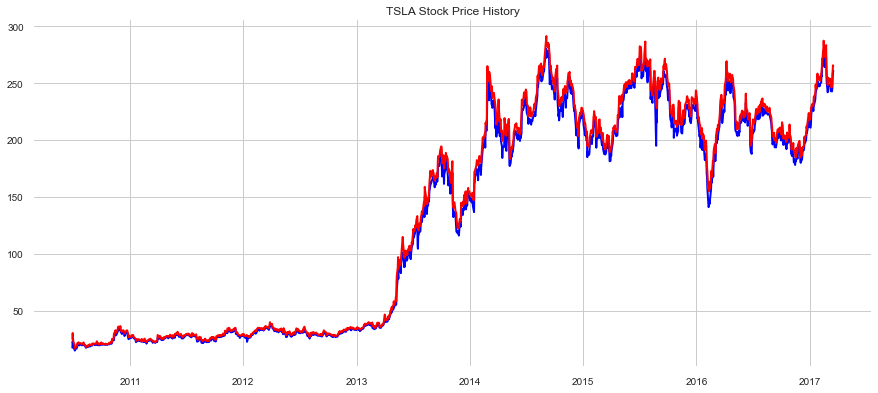

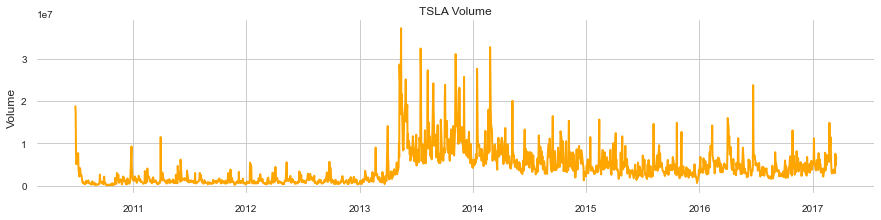

In [46]:
fig = plt.figure(figsize=(15, 14))
ax1 = fig.add_subplot(2,1,1)
fig2 = plt.figure(figsize=(15,7))
ax2 = fig2.add_subplot(2,1,2)

#ax1.plot(tesla['Open'], color = "blue", linewidth = 1)
#ax1.plot(tesla['Close'], color = 'navy', linewidth = 1)
ax1.set_title('TSLA Stock Price History')
ax1.plot(tesla['Low'], color = "blue", linewidth = 2)
ax1.plot(tesla['High'], color = "red", linewidth = 2)
ax2.set_ylabel("Stock Price", fontsize = 12)
ax2.plot(tesla['Volume'], color = "orange", linewidth = 2)
ax2.set_title('TSLA Volume')
ax2.set_ylabel("Volume", fontsize =12 )




2. Moving average of Tesla Stock

    The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, from this dataset we will use 10 days, 50 days, 200 days. 
    

In [93]:
ma_day = [10, 50, 200]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    tesla[column_name] = tesla['Adj Close'].rolling(ma).mean()

print(tesla.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days', 'MA for 200 days'],
      dtype='object')


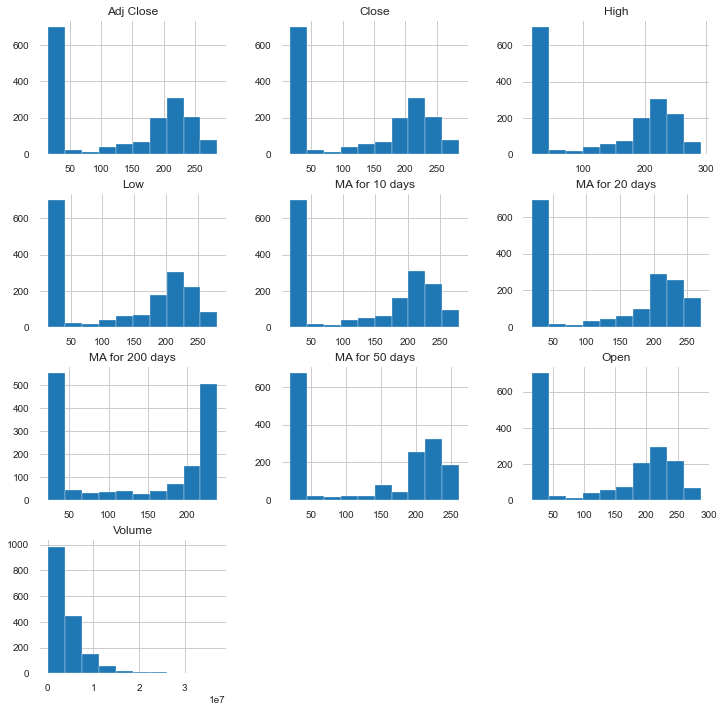

In [95]:
tesla.hist(figsize=(12, 12));

Histogram is a representation of the distribution of data. This function groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib.axes.Axes. This is useful when the DataFrame’s Series are in a similar scale. However I'm not sure what this graph tells us hmm ? 

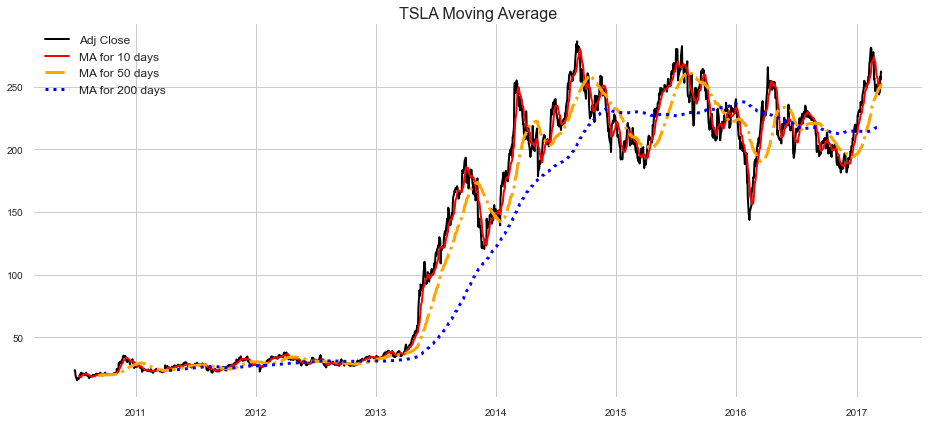

In [137]:
fig = plt.figure(figsize=(13, 6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(tesla['Adj Close'], color = 'black', linewidth = 2, label = 'Adj Close')
ax1.plot(tesla['MA for 10 days'], color = 'red', linewidth = 2, label ='MA for 10 days')
ax1.plot(tesla['MA for 50 days'], color = 'orange', linewidth = 3, label = 'MA for 50 days', linestyle = '-.')
ax1.plot(tesla['MA for 200 days'], color = 'blue', linewidth = 3, label = 'MA for 200 days', linestyle = ':')
plt.legend(loc='upper left', fontsize = 12)
ax1.set_title('TSLA Moving Average', fontsize = 16)

"""# CONTINGENT
When doing multiple stock analysis  

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

tesla[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Tesla Moving Average ')

fig.tight_layout()

company2[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=axes[0,1])
axes[0,1].set_title('company2')
"""

fig.tight_layout()

3. Daily return of the stock on average 

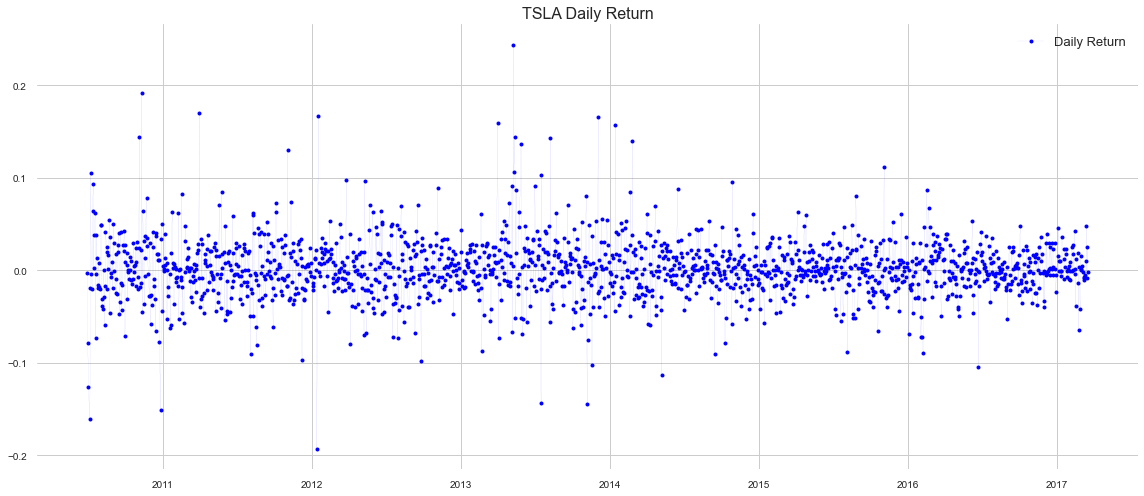

In [166]:
tesla['Daily Return'] = tesla['Adj Close'].pct_change()

fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(tesla['Daily Return'], color = 'blue', linestyle='-.',marker ='o', linewidth = 0.05, markersize = 4, label = 'Daily Return')
plt.legend(loc='upper right', fontsize = 13)
ax1.set_title('TSLA Daily Return', fontsize = 16)
fig.tight_layout()

Average daily return using histogram. 
"sns.displot" combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions. 
https://seaborn.pydata.org/generated/seaborn.distplot.html for more information. 
https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/ for good tips. 

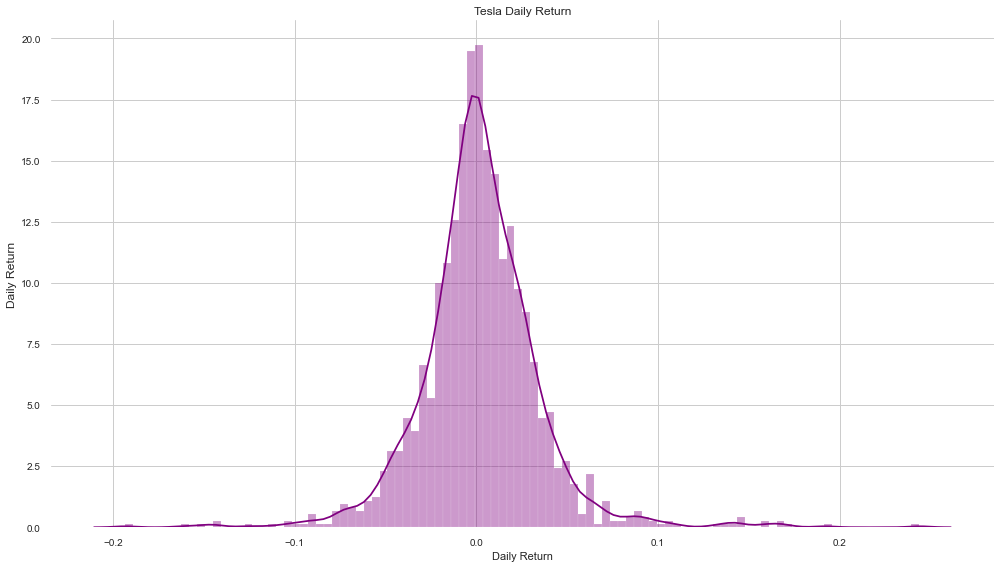

In [172]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
fig = plt.figure(figsize=(14, 8))
ax1 = sns.distplot(tesla['Daily Return'].dropna(), bins = 100, color = 'purple')
ax1.set_ylabel("Daily Return", fontsize = 12)
ax1.set_title('Tesla Daily Return')
fig.tight_layout()